# Credit Card Fraud Detection using unsupervised learning

In [1]:
#importing the necessary packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data file (which is in csv format)
data = pd.read_csv('creditcard.csv')
data1 = data
print(data.shape)

(284807, 31)


In [3]:
#since data is very large we are using just 10% of the original data
data = data.sample(frac = 0.1 , random_state = 1)
print(data.shape)

(28481, 31)


In [4]:
#determining the number of fraud cases in the dataset
Fraud = data[data["Class"]==1]
Valid = data[data["Class"]==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier_Fraction: {}".format(outlier_fraction))
print("Fraud Cases: {} " .format(len(Fraud)) )
print("Valid Cases: {} " .format(len(Valid)) )

Outlier_Fraction: 0.0017234102419808666
Fraud Cases: 49 
Valid Cases: 28432 


# Heat map plot

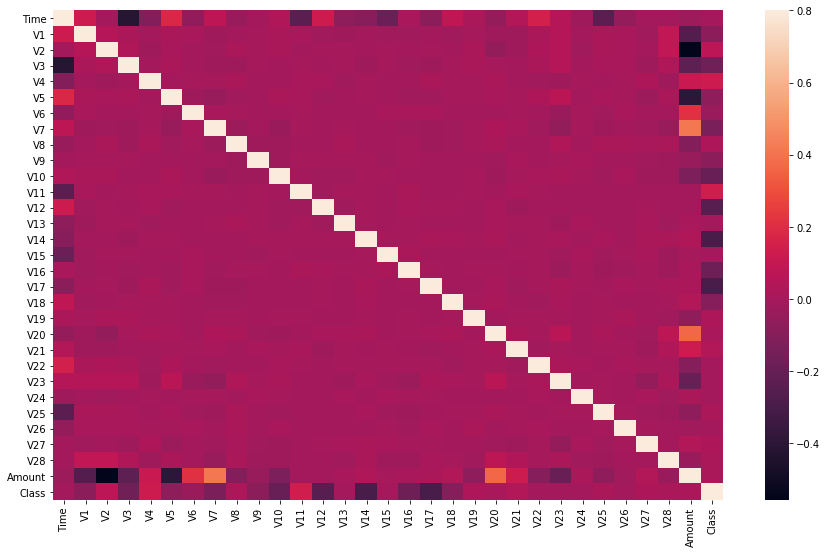

In [5]:
#correlation matrix to study the dependence between the parameters

corrmat = data.corr()
fig = plt.figure(figsize = (15 , 9))
sns.heatmap(corrmat , vmax = 0.8 , square = 0)
plt.show()

In [6]:
#obtaining the input features and result into X and Y
X = data.drop(["Class"] , axis = 1 )
Y = data["Class"]
x1 = data1.drop(["Class"] , axis = 1)
y1 = data1['Class']
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# Implementing Anomaly Detection

In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score , classification_report

In [8]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(x1.values, y1.values, test_size = 0.2, random_state = 42) 


# Random Forest

In [9]:
rfc = RandomForestClassifier() 
rfc.fit(X, Y) 
# predictions 
ypred = rfc.predict(xTest) 
n_errors = (ypred!=yTest).sum()
clf_name = "Random Factor"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy:")
print(accuracy_score(yTest, ypred))
print(classification_report(yTest, ypred))

Random Factor: 32
Accuracy:
0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.73      0.82        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# Local Outlier Factor

In [10]:
clf = LocalOutlierFactor(contamination = outlier_fraction)
ypred = clf.fit_predict(X , Y)
ypred[ypred==1] = 0 
ypred[ypred==-1] = 1
n_errors = (ypred!=Y).sum()
clf_name = "Local Outlier Factor"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy")
print(accuracy_score(Y, ypred))
print(classification_report(Y, ypred))

Local Outlier Factor: 97
Accuracy
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



# Isolation Forest

In [11]:
clf = IsolationForest(max_samples = len(X) , contamination = outlier_fraction)
clf.fit(X , Y)
ypred = clf.predict(X)
ypred[ypred==1] = 0 
ypred[ypred==-1] = 1
n_errors = (ypred!=Y).sum()
clf_name = "Isolation Forest"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy")
print(accuracy_score(Y, ypred))
print(classification_report(Y, ypred))

Isolation Forest: 75
Accuracy
0.9973666654962958
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481



# Guassian Method

In [12]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X ,Y)
ypred = clf.predict(xTest)
n_errors = (ypred!=yTest).sum()
clf_name = "Guassian Method"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy")
print(accuracy_score(yTest, ypred))
print(classification_report(yTest, ypred))

Guassian Method: 501
Accuracy
0.9912046627576279
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.67      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.83      0.60     56962
weighted avg       1.00      0.99      0.99     56962



Accuracy may be high and above 99% for all the algorithms but Random Forest Method is gives the best results as it 
has the largest precsion value of 0.92 followed by Isolation Forest which has a precision value of 0.02 .